In [39]:
!ls data

hg38  replogle


Replogle Expression Data: 
https://plus.figshare.com/articles/dataset/_Mapping_information-rich_genotype-phenotype_landscapes_with_genome-scale_Perturb-seq_Replogle_et_al_2022_processed_Perturb-seq_datasets/20029387

Replogle sgRNA data:
https://www.biorxiv.org/content/10.1101/2021.12.16.473013v1.supplementary-material?versioned=true

Notes from paper:
In K562 cell line, we performed two Perturb-seq screens: one targeting all expressed genes sampled at day145
8 after transduction (n=9,866 genes; n=10,673 total perturbations; some genes have multiple independent transcripts) and another targeting common essential genes, which was sampled at day147 It is made after after transduction (n=2,057 genes; n=2,176 total perturbations)
In RPE1 cells, we performed a screen targeting common153 essential genes plus a subset of nonessential genes that produced phenotypes in K562 cells sampled at day 7 after transduction (n=2,393 genes; n=2,549 total perturbations).

In [1]:
import pandas as pd

In [41]:
dfs=[]
files =  !(ls data/replogle/*.xlsx)
for x in files:
    dfs.append(pd.read_excel(x))
    print(dfs[-1].shape)

(69, 5)
(11294, 10)
(2291, 10)
(2688, 10)
(17, 2)
(17, 2)
(17, 2)
(15, 2)
(10, 2)


In [42]:
dfs[2]

,unique sgRNA pair ID,gene,transcript,ensembl gene id,sgID_A,targeting sequence A,sgID_B,targeting sequence B,duplicated guide pair?,either guide duplicated?
0,2_AAAS_P1P2_ENSG00000094914,AAAS,P1P2,ENSG00000094914,AAAS_-_53715438.23-P1P2,GAGGACGAGTACGCGGTCCC,AAAS_+_53715355.23-P1P2,GCCTCGCCGTTTGTCCCTTG,False,False
1,8_AAMP_P1P2_ENSG00000127837,AAMP,P1P2,ENSG00000127837,AAMP_+_219134851.23-P1P2,GGTCGCGCAGAGCTGACTCT,AAMP_+_219134841.23-P1P2,GGCTGACTCTGGGAGGCGTT,False,False
2,10_AARS2_P1P2_ENSG00000124608,AARS2,P1P2,ENSG00000124608,AARS2_+_44281027.23-P1P2,GAGTGGCAGCTGCAGCCCGG,AARS2_+_44281044.23-P1P2,GGCTACGATGGCAGCGTCAG,False,False
3,13_AARS_P1P2_ENSG00000090861,AARS,P1P2,ENSG00000090861,AARS_+_70323362.23-P1P2,GTGCAGCGGGCCCTTGGCGG,AARS_-_70323332.23-P1P2,GAGGGCGGCCTACCTCTCCT,False,False
4,14_AASDHPPT_P1P2_ENSG00000149313,AASDHPPT,P1P2,ENSG00000149313,AASDHPPT_+_105948405.23-P1P2,GCGGACCTCGCCGCTATCTC,AASDHPPT_+_105948450.23-P1P2,GGGCACCAAGCAGAACCGTT,False,True
...,...,...,...,...,...,...,...,...,...,...
2286,11305_non-targeting_non-targeting_non-targeting,non-targeting,non-targeting,non-targeting,non-targeting_03624,GGCGCTGACGTACGTAGCAT,non-targeting_03589,GTTGGTTACCCCTCGATTGG,False,False
2287,11310_non-targeting_non-targeting_non-targeting,non-targeting,non-targeting,non-targeting,non-targeting_03639,GGGCCCGCCACGCCGTAACC,non-targeting_01632,GGCTCCAGTTCCGCATGCCA,False,False
2288,11313_non-targeting_non-targeting_non-targeting,non-targeting,non-targeting,non-targeting,non-targeting_03665,GCGATACGTATGAGGTCTCT,non-targeting_03703,GTGGCGGTGATCGCGAGGCA,False,False
2289,11314_non-targeting_non-targeting_non-targeting,non-targeting,non-targeting,non-targeting,non-targeting_03674,GTGCGGCCAGTCGGCAACTG,non-targeting_00904,GCACCAAGTGAGCGATCAGA,False,False


In [5]:
dfs[2].gene.value_counts()

gene
non-targeting    109
ZNF718             3
TUT1               2
CENPA              2
MFN2               2
                ... 
IFITM2             1
IARS               1
IARS2              1
HYPK               1
INTS1              1
Name: count, Length: 2063, dtype: int64

In [45]:
import anndata as ad
#adata = ad.read_h5ad("data/K562_essential_raw_bulk_01.h5ad")
adata = ad.read_h5ad("data/replogle/K562_gwps_raw_bulk_01.h5ad")

In [83]:
adata.obs.control_expr

gene_transcript
0_A1BG_P1_ENSG00000121410            0.171285
10000_ZBTB46_P1P2_ENSG00000130584    0.026212
10001_ZBTB47_P1P2_ENSG00000114853    0.048150
10002_ZBTB48_P1P2_ENSG00000204859    0.134619
10003_ZBTB49_P1P2_ENSG00000168826    0.026936
                                       ...   
9998_ZBTB44_P1P2_ENSG00000196323     0.424688
9999_ZBTB45_P1P2_ENSG00000119574     0.073588
999_C16orf91_P1P2_ENSG00000174109    0.569768
99_ACSL1_P1P2_ENSG00000151726        0.040591
9_AAR2_P1P2_ENSG00000131043          0.174746
Name: control_expr, Length: 11258, dtype: float64

Text(0.5, 0, 'log2fc')

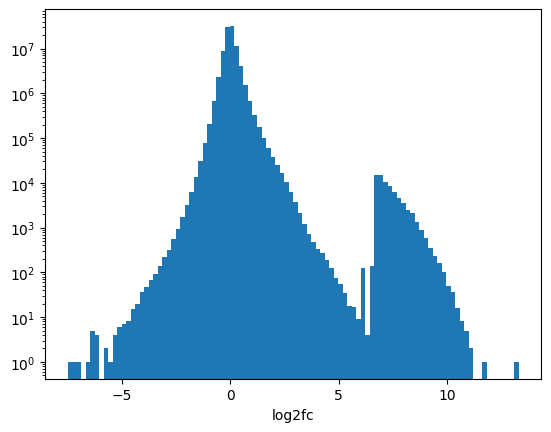

In [141]:
import scanpy as sp
import numpy as np
delta = 10e-4
_=plt.hist(
            (
             np.repeat(np.log2(np.array(adata[adata.obs[adata.obs.core_control].index].X.mean(axis=0) + delta))[np.newaxis, ...],adata.X.shape[0],0)
                -np.log2(adata.X+delta)
            ).flatten(), bins = 100)
plt.yscale('log')
plt.xlabel('log2fc')

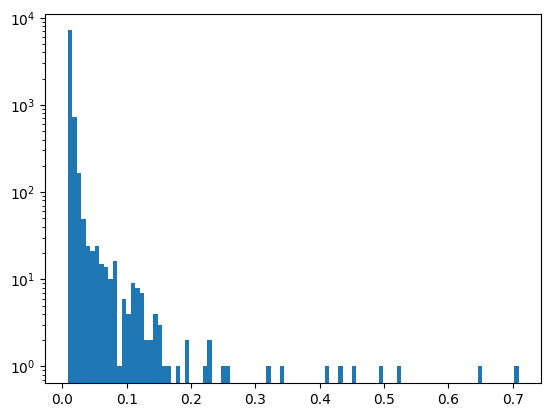

In [139]:
plt.hist(adata[adata.obs[adata.obs.core_control].index].X.var(axis=0)/adata[adata.obs[adata.obs.core_control].index].X.mean(axis=0),bins=100)  #Core controls
plt.yscale('log')

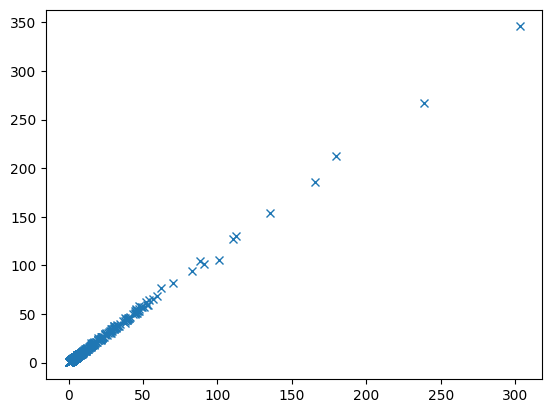

In [8]:
import matplotlib.pyplot as plt
plt.plot(adata['2_AAAS_P1P2_ENSG00000094914'].X.squeeze(),adata['14_AASDHPPT_P1P2_ENSG00000149313'].X.squeeze(),'x')

In [9]:
adata['2_AAAS_P1P2_ENSG00000094914'].X.squeeze().shape
adata.X.shape

(11258, 8248)

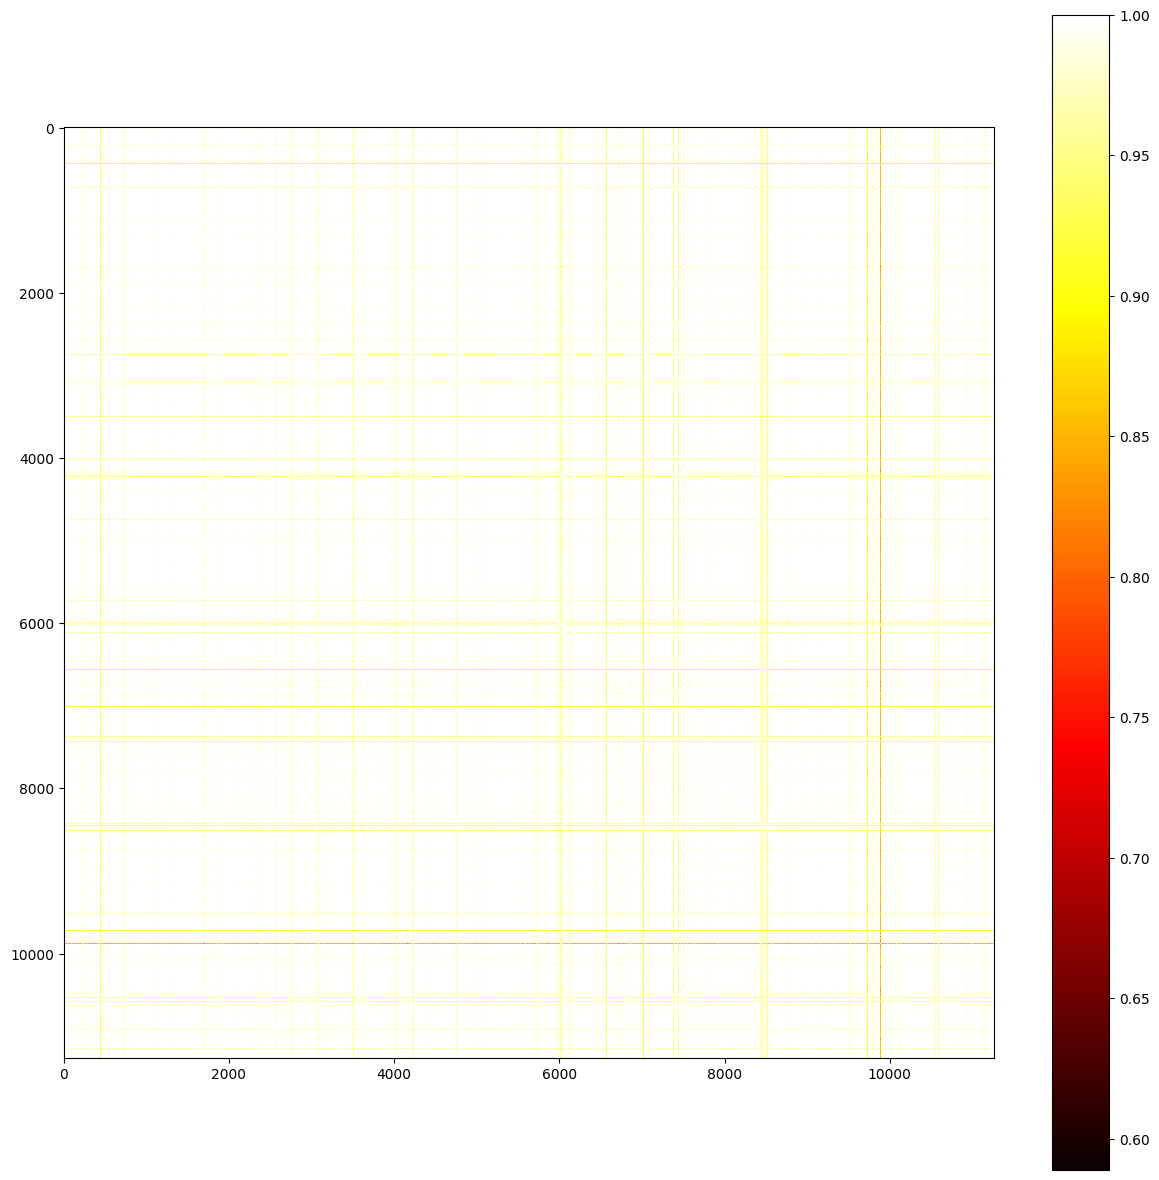

In [10]:
import numpy as np
plt.figure(figsize=(15,15))
plt.imshow(np.corrcoef(adata.X), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [11]:
corr = np.corrcoef(adata.X)[np.triu_indices(adata.X.shape[0])]

Text(0, 0.5, 'corr coef between samples (expr)')

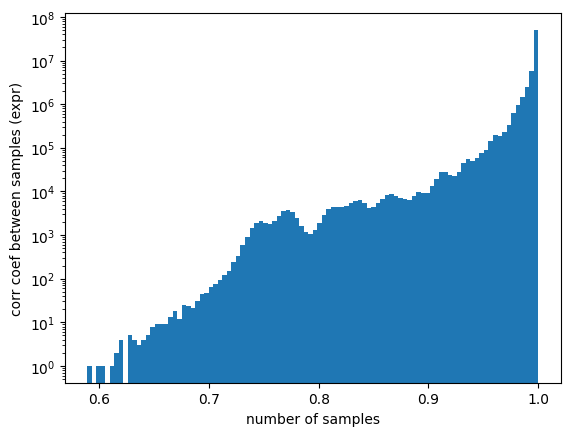

In [12]:
_=plt.hist(corr, bins=100)
plt.yscale('log')
plt.xlabel('number of samples')
plt.ylabel('corr coef between samples (expr)')

In [13]:
meanexpr = adata.X.mean(axis=0)[None,:]

In [14]:
de = adata.X/meanexpr

Text(0, 0.5, 'number of de')

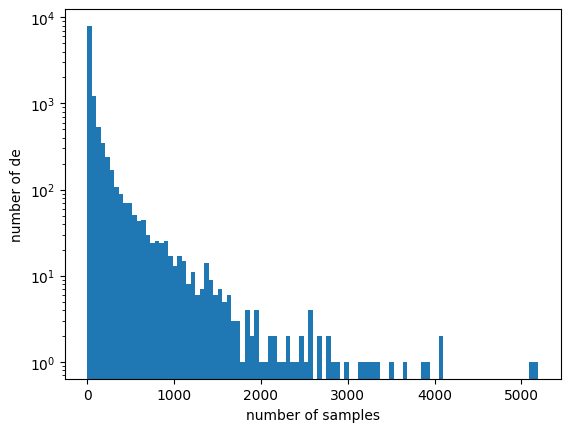

In [15]:
plt.figure()
plt.hist(((de > 2) | (de < 0.5)).sum(axis=1), bins=100)
plt.yscale('log')
plt.xlabel('number of samples')
plt.ylabel('number of de')

There are sgrna target genes, and then measured genes, how do they overlap?

In [16]:
import csv
genes_measured = set(adata.var.index.tolist())
genes_perturb = set(dfs[1]['ensembl gene id'].tolist())
print(len(genes_measured & genes_perturb)/len(genes_measured),' of genes measured')
print(len(genes_measured & genes_perturb)/len(genes_perturb),' of genes perturbed')
all_genes = list(genes_measured | genes_perturb)
all_genes.remove('non-targeting')
all_genes.remove(np.nan)
print(len(all_genes), ' total genes overall')
filename='all_replogle_genes.csv'
with open(filename, "w", newline="") as file:
    writer = csv.writer(file)
    for row in all_genes:
        writer.writerow([row])

0.9323472356935014  of genes measured
0.7786553260429324  of genes perturbed
10432  total genes overall


In [17]:
from pyensembl import EnsemblRelease
# release 77 uses human reference genome GRCh38
data = EnsemblRelease(77)
#transcript = data.transcript_by_id('ENSG00000160321')

ModuleNotFoundError: No module named 'pyensembl'

In [ ]:
from pyensembl import EnsemblRelease
from collections import defaultdict
genome = EnsemblRelease(release=100, species="homo_sapiens") 
e,c,a,c2 = 0,0,0,0
all_exons = []
all_exon_coords = defaultdict(list)
exome_by_gene = defaultdict(dict)
coding_by_gene = defaultdict(list)
na = 0
for gene in all_genes:
    exons = genome.exon_ids_of_gene_id(gene)
    transcripts = genome.transcript_ids_of_gene_id(gene)
    exome_coords_plus = []
    exome_coords_minus = []
    if len(transcripts)==0:
        print('no tscript for ', gene)
    for transcript in transcripts:
        t = genome.transcript_by_id(transcript)
        if t.contains_start_codon and t.contains_stop_codon:
            x = t.coding_sequence
            if len(x) == 0:
                print('no seq for ', transcript)
                continue
            c2+=len(x)
            coding_by_gene[gene].append(x)
            if t.strand == '+':
                exome_coords_plus += t.coding_sequence_position_ranges
            else:
                assert t.strand == '-'
                exome_coords_minus += t.coding_sequence_position_ranges
            break
    if len(coding_by_gene[gene]) == 0:
        #print('coudlnt get code for ', gene)
        na+=1
        #coding_by_gene[gene] = None
    all_exon_coords['+'] += exome_coords_plus
    all_exon_coords['-'] += exome_coords_minus
    exome_by_gene['+'][gene] = exome_coords_plus
    exome_by_gene['-'][gene] = exome_coords_minus

    """
        c+=len(genome.transcript_sequence(transcript))
    a+=len(genome.transcript_sequence(transcripts[0]))
    all_exons += exons
    all_exon_gene=[]
    for exon in exons:
        get = genome.exon_by_id(exon)
        #print(get)
        exit()
        all_exon_coords.append([get.start,get.end])
        all_exon_gene.append([get.start,get.end])
        e += get.end-get.start
    """
    #exome_by_gene[gene]=mergeOverlap(all_exon_gene)
print('one transcript for each gene:', a/10**6, 'M nucleotides')
print('all transcripts for each gene:', float(c2)/float(10.0**6), 'M nucleotides')
#print('all exons for all genes:', float(x)/10.0**6, 'M nucleotides')
#print(len(all_genes), ' total genes')
#print(len(all_exon_coords), 'total exons')
print(na/len(all_genes), ' have no coding seq')

In [ ]:
import torch
torch.save(coding_by_gene, 'coding_by_gene.pt')

In [ ]:
def getOverlap(a, b):
    return max(0, min(a[1], b[1]) - max(a[0], b[0]))
def mergeOverlap(input_arr):
    # Sort intervals based on start values
    arr = [list(x) for x in sorted(input_arr)]
    #print(arr[0:10])
    res = []
    res.append(arr[0])
    for i in range(1, len(arr)):
        last = res[-1]
        curr = arr[i]
        # If current interval overlaps with the last merged
        # interval, merge them 
        if curr[0] <= last[1]:
            last[1] = max(last[1], curr[1])
        else:
            res.append(curr)
    return res
def intervalLength(intervals):
    l=0
    for start,end in intervals:
        l += end-start
    return l

In [21]:
import numpy as np
exome_length_by_gene = {
                        '+': {k: intervalLength(mergeOverlap(v)) for k,v in exome_by_gene['+'].items() if len(v)>0},
                        '-': {k: intervalLength(mergeOverlap(v)) for k,v in exome_by_gene['-'].items() if len(v)>0}
                       }
#exome_length_by_gene = {k: intervalLength(mergeOverlap(v)) for k,v in exome_by_gene['+'].items() if len(v)>0}
_= plt.hist(np.log10(list(exome_length_by_gene['+'].values())),bins=100,label='+',alpha=0.5)
_= plt.hist(np.log10(list(exome_length_by_gene['-'].values())),bins=100,label='-',alpha=0.5)
#plt.yscale('log')

plt.xlabel('log(count) of unique nucleotides')
plt.ylabel('Number of Genes in dataset with count')
plt.legend()
note = f"Total Count\n  +: {sum(exome_length_by_gene['+'].values())/10**6}M\n   -: {sum(exome_length_by_gene['-'].values())/10**6}M"
plt.annotate(note,(2,140))


NameError: name 'exome_by_gene' is not defined

In [80]:
import itertools
all_exon_coords[0]
overlap = 0
length_adj = 0
sorted_coords = sorted(all_exon_coords,key=lambda x: x[0])
sorted_coords[0:50]
look_ahead=10
for i in range(len(sorted_coords)):
    q = sorted_coords[i]
    for j in range(i+1,min(i+look_ahead,len(sorted_coords))):
        p = sorted_coords[j]
        ol = getOverlap(p,q)
        if ol>0:
            overlap+=ol
            #Start of j is always larger than start of i
            if q[1] >= p[1]: #is fully contained, delete it
                sorted_coords[j]=[0,0]
            else:
                sorted_coords[j] = [q[1]+1,p[1]]
            length_adj += sorted_coords[j][1]-sorted_coords[j][0]
            #print(q,p,sorted_coords[j],i,j)
print(overlap/10**6, 'M Overlapping Exon Nuceotides')
print(length_adj/10**6, 'M Non-overlapping Exon Nuceotides')
#print((e-overlap)/10**6, 'M Non-overlapping Nuceotides')
print(e/10**6, 'M Exon Nuceotides')

TypeError: 'int' object is not subscriptable

In [ ]:
def get_unique_intervals(coords, look_ahead=10, overlap=0,length_adj=0):
    sorted_coords = [list(x) for x in sorted(coords,key=lambda x: x[0])]
    print(sorted_coords[0:10])
    for i in range(len(sorted_coords)):
        q = sorted_coords[i]
        for j in range(i+1,min(i+look_ahead,len(sorted_coords))):
            p = sorted_coords[j]
            ol = getOverlap(p,q)
            if ol>0:
                overlap+=ol
                #Start of j is always larger than start of i
                if q[1] >= p[1]: #is fully contained, delete it
                    sorted_coords[j]=[0,0]
                else:
                    sorted_coords[j] = (q[1]+1,p[1])
                length_adj += sorted_coords[j][1]-sorted_coords[j][0]
    return sorted_coords, overlap, length_adj
sorted_coords, y,length_adj = get_unique_intervals(res) 
sorted_coords = [[x1,x2] for x1,x2 in sorted_coords if x1+x2>0]
print(y,length_adj)
l=0
res = sorted_coords
print(res[0:10])
for start,end in res:
    l += end-start
print(l/10**6)
print(len(res))

In [ ]:
plt.hist(all_exon_lengths, bins=1000)
plt.yscale('log')
plt.xlim(0,15000)
plt.xlabel('Number of exons of length y')
plt.ylabel('Exon length')

In [ ]:
genome.exon_by_id(exons[0])

In [ ]:
transcript = data.transcript_by_id('ENST00000601773')
transcript

In [ ]:
genome.exon_by_id(exons[0])

In [ ]:
from pyfaidx import Fasta
from pathlib import Path
import math
MAX_ALLOWED_LENGTH=2**16
class FastaInterval:
    """Retrieves sequences from a fasta file given a chromosome and start/end indices."""
    def __init__(
            self,
            *,
            fasta_file,
            return_seq_indices=False,
            rc_aug=False,
    ):
        fasta_file = Path(fasta_file)
        assert fasta_file.exists(), "Path to fasta file must exist!"

        self.seqs = Fasta(str(fasta_file))
        self.return_seq_indices = return_seq_indices
        self.rc_aug = rc_aug

        # calc len of each chromosome in fasta file, store in dict
        self.chr_lens = {}

        for chr_name in self.seqs.keys():
            self.chr_lens[chr_name] = len(self.seqs[chr_name])
        print(self.chr_lens)

    @staticmethod
    def _compute_interval(start, end, max_length, i_shift):
        if max_length == MAX_ALLOWED_LENGTH:
            return start, end
        if max_length < MAX_ALLOWED_LENGTH:
            assert MAX_ALLOWED_LENGTH % max_length == 0
            return start + i_shift * max_length, start + (i_shift + 1) * max_length
        else:
            raise ValueError(f"`max_length` {max_length} (> 2^{int(math.log(MAX_ALLOWED_LENGTH, 2))}) is too large!")

    def __call__(
            self,
            chr_name,
            start,
            end,
            max_length,
            i_shift,
            return_augs=False,
    ):
        """
        max_length passed from dataset, not from init
        """
        chromosome = self.seqs[chr_name]
        chromosome_length = self.chr_lens[chr_name]

        start, end = self._compute_interval(start, end, max_length, i_shift)

        if end > chromosome_length:
            # Shift interval down
            start = start - (end - chromosome_length)
            end = chromosome_length
            assert start == chromosome_length - max_length

        if start < 0:
            # Shift interval up
            end = end - start
            start = 0
            assert end == max_length

        if end > chromosome_length:
            # This may occur if start + MAX_ALLOWED_LENGTH extends beyond the end of the chromosome
            start = chromosome_length - max_length
            end = chromosome_length

        seq = str(chromosome[start:end])

        if self.rc_aug and coin_flip():
            seq = string_reverse_complement(seq)

        return seq

In [ ]:
fasta = FastaInterval(
            fasta_file='data/hg38/hg38.ml.fa',
            return_seq_indices=True,
            rc_aug=False
        )

In [ ]:
fasta.seqs['chr3'][10000:90000]

# Dataloader

In [106]:
"""Character tokenizer for Hugging Face.

"""

from typing import List, Optional, Dict, Sequence, Tuple

from transformers import PreTrainedTokenizer


class CaduceusTokenizer(PreTrainedTokenizer):
    model_input_names = ["input_ids"]

    def __init__(self,
                 model_max_length: int,
                 characters: Sequence[str] = ("A", "C", "G", "T", "N"),
                 complement_map=None,
                 bos_token="[BOS]",
                 eos_token="[SEP]",
                 sep_token="[SEP]",
                 cls_token="[CLS]",
                 pad_token="[PAD]",
                 mask_token="[MASK]",
                 unk_token="[UNK]",
                 **kwargs):
        """Character tokenizer for Hugging Face transformers.

        Adapted from https://huggingface.co/LongSafari/hyenadna-tiny-1k-seqlen-hf/blob/main/tokenization_hyena.py
        Args:
            model_max_length (int): Model maximum sequence length.
            characters (Sequence[str]): List of desired characters. Any character which
                is not included in this list will be replaced by a special token called
                [UNK] with id=6. Following is a list of the special tokens with
                their corresponding ids:
                    "[CLS]": 0
                    "[SEP]": 1
                    "[BOS]": 2
                    "[MASK]": 3
                    "[PAD]": 4
                    "[RESERVED]": 5
                    "[UNK]": 6
                an id (starting at 7) will be assigned to each character.
            complement_map (Optional[Dict[str, str]]): Dictionary with string complements for each character.
        """
        if complement_map is None:
            complement_map = {"A": "T", "C": "G", "G": "C", "T": "A", "N": "N"}
        self.characters = characters
        self.model_max_length = model_max_length

        self._vocab_str_to_int = {
            "[CLS]": 0,
            "[SEP]": 1,
            "[BOS]": 2,
            "[MASK]": 3,
            "[PAD]": 4,
            "[RESERVED]": 5,
            "[UNK]": 6,
            **{ch: i + 7 for i, ch in enumerate(self.characters)},
        }
        self._vocab_int_to_str = {v: k for k, v in self._vocab_str_to_int.items()}
        add_prefix_space = kwargs.pop("add_prefix_space", False)
        padding_side = kwargs.pop("padding_side", "left")

        self._complement_map = {}
        for k, v in self._vocab_str_to_int.items():
            complement_id = self._vocab_str_to_int[complement_map[k]] if k in complement_map.keys() else v
            self._complement_map[self._vocab_str_to_int[k]] = complement_id

        print(kwargs)

        super().__init__(
            bos_token=bos_token,
            eos_token=eos_token,
            sep_token=sep_token,
            cls_token=cls_token,
            pad_token=pad_token,
            mask_token=mask_token,
            unk_token=unk_token,
            add_prefix_space=add_prefix_space,
            model_max_length=model_max_length,
            padding_side=padding_side,
            #**kwargs,
        )

    @property
    def vocab_size(self) -> int:
        return len(self._vocab_str_to_int)

    @property
    def complement_map(self) -> Dict[int, int]:
        return self._complement_map

    def _tokenize(self, text: str, **kwargs) -> List[str]:
        return list(text.upper())  # Convert all base pairs to uppercase

    def _convert_token_to_id(self, token: str) -> int:
        return self._vocab_str_to_int.get(token, self._vocab_str_to_int["[UNK]"])

    def _convert_id_to_token(self, index: int) -> str:
        return self._vocab_int_to_str[index]

    def convert_tokens_to_string(self, tokens):
        return "".join(tokens)  # Note: this operation has lost info about which base pairs were originally lowercase

    def get_special_tokens_mask(
        self,
        token_ids_0: List[int],
        token_ids_1: Optional[List[int]] = None,
        already_has_special_tokens: bool = False,
    ) -> List[int]:
        if already_has_special_tokens:
            return super().get_special_tokens_mask(
                token_ids_0=token_ids_0,
                token_ids_1=token_ids_1,
                already_has_special_tokens=True,
            )

        result = ([0] * len(token_ids_0)) + [1]
        if token_ids_1 is not None:
            result += ([0] * len(token_ids_1)) + [1]
        return result

    def build_inputs_with_special_tokens(
        self, token_ids_0: List[int], token_ids_1: Optional[List[int]] = None
    ) -> List[int]:
        sep = [self.sep_token_id]
        # cls = [self.cls_token_id]
        result = token_ids_0 + sep
        if token_ids_1 is not None:
            result += token_ids_1 + sep
        return result

    def get_vocab(self) -> Dict[str, int]:
        return self._vocab_str_to_int

    # Fixed vocabulary with no vocab file
    def save_vocabulary(self, save_directory: str, filename_prefix: Optional[str] = None) -> Tuple:
        return ()


In [149]:
import torch
#import transformers
#from datasets import load_dataset
#from src.dataloaders.utils.rc import coin_flip, string_reverse_complement
import anndata as ad
import pandas as pd
#adata = ad.read_h5ad("data/K562_essential_raw_bulk_01.h5ad")
#from caduceus.tokenization_caduceus import CaduceusTokenizer
MAX_ALLOWED_LENGTH=2**24

import scanpy as sp
import numpy as np

class ReplogleDataset(torch.utils.data.Dataset):
    """
    Loop through fasta file for sequence.
    Returns a generator that retrieves the sequence.
    """
    def __init__(
        self,
        split,
        #max_length,
        expression_h5ad="data/replogle/K562_gwps_raw_bulk_01.h5ad",
        sgrna = False,
        dataset_name=None,
        d_output=2,  # default binary classification
        tokenizer=CaduceusTokenizer(model_max_length=MAX_ALLOWED_LENGTH),
        tokenizer_name=None,
        use_padding=None,
        add_eos=True,
        add_cls=True,
        rc_aug=False,
        conjoin_train=False,
        conjoin_test=False,
        return_augs=False,
        shuffle_genes=True,
        seed = 0,
        delta=1e-4,
    ):

        torch.manual_seed(seed)
        self.sgrna = sgrna
        #self.max_length = max_length
        self.use_padding = use_padding
        self.tokenizer_name = tokenizer_name
        self.tokenizer = tokenizer
        self.return_augs = return_augs
        self.add_eos = add_eos
        self.add_cls = add_cls
        self.d_output = d_output  # needed for decoder to grab
        assert not (conjoin_train and conjoin_test), "conjoin_train and conjoin_test cannot both be True"
        if (conjoin_train or conjoin_test) and rc_aug:
            print("When using conjoin, we turn off rc_aug.")
            rc_aug = False
        self.rc_aug = rc_aug
        self.conjoin_train = conjoin_train
        self.conjoin_test = conjoin_test
        self.shuffle_genes=shuffle_genes
        self.split = split

        # For NT tasks, we use data from InstaDeepAI/nucleotide_transformer_downstream_tasks
        self.seqs = torch.load('data/replogle/coding_by_gene.pt')
        self.samples = ad.read_h5ad(expression_h5ad)
        self.target_genes = self.samples.var.index.tolist()
        self.num_targets = len(self.target_genes)
        self.sample_genes = self.samples.obs.index.tolist()
        self.num_samples = len(self.sample_genes)
        self.sgrnas = pd.read_excel("data/replogle/media-2.xlsx", index_col='unique sgRNA pair ID')
        self.delta = delta
        self.control = self.samples[self.samples.obs[self.samples.obs.core_control].index].X.mean(axis=0)
        #print(self.sgrnas)

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        target_name = self.sample_genes[idx]
        sgrna = self.sgrnas.loc[target_name]
        sgrna_seqs = [sgrna['targeting sequence A'],sgrna['targeting sequence B']]
        target_expr = self.samples[target_name].X.squeeze()

        log_fold_change = np.log2(self.control + self.delta)-np.log2(target_expr+self.delta)

        indices = (torch.randperm(self.num_targets) if self.shuffle_genes else torch.arange(self.num_targets)).tolist()
        
        seq_ids, y, yl = [],[], []
        for x in sgrna_seqs:
            seq = self.tokenizer(
                    x,
                    add_special_tokens=False,
                    padding='do_not_pad', #"max_length" if self.use_padding else None,
                    max_length=None, #self.max_length,
                    truncation=False, #True,
                )
            seq_ids+=seq["input_ids"]
            if self.add_eos:
                # append list seems to be faster than append tensor
                seq_ids.append(self.tokenizer.sep_token_id) 
        sgrna = torch.LongTensor(seq_ids)
        if not self.sgrna:
            seq_ids = []
        #TODO need to add all sample genes to this list too
        for idx in indices:
            gene = self.target_genes[idx]
            x = "".join(self.seqs[gene])
            if len(x) == 0:
                #print("no gene for ", gene)
                continue
            yl.append(log_fold_change[idx].item())
            y.append(target_expr[idx].item())
            #I don't know what this is but it was here before
            if (self.rc_aug or (self.conjoin_test and self.split == "train")) and coin_flip():
                x = string_reverse_complement(x)
            #print('idx',idx,len(x))
            seq = self.tokenizer(
                x,
                add_special_tokens=False,
                padding='do_not_pad', #"max_length" if self.use_padding else None,
                max_length=None, #self.max_length,
                truncation=False, #True,
            )
            seq_ids+=seq["input_ids"]  # get input_ids
            if self.add_cls:
                seq_ids.append(self.tokenizer.cls_token_id)
            # need to handle eos here
            if self.add_eos:
                # append list seems to be faster than append tensor
                seq_ids.append(self.tokenizer.sep_token_id)
        #print(seq_ids)
        seq_ids = torch.LongTensor(seq_ids)
        #print(y.shape)
        target = torch.Tensor(y)
        targetl = torch.Tensor(yl) #Log fold change
        #target = torch.from_numpy(np.concat(y))
        return seq_ids, target, targetl, sgrna


{}


In [150]:
#anndata = ad.read_h5ad("data/replogle/K562_gwps_raw_bulk_01.h5ad")

In [158]:
dataset = ReplogleDataset('train')

/tmp/ipykernel_315010/851535862.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.seqs = torch.load('data/replogle/coding_by_gene.pt')


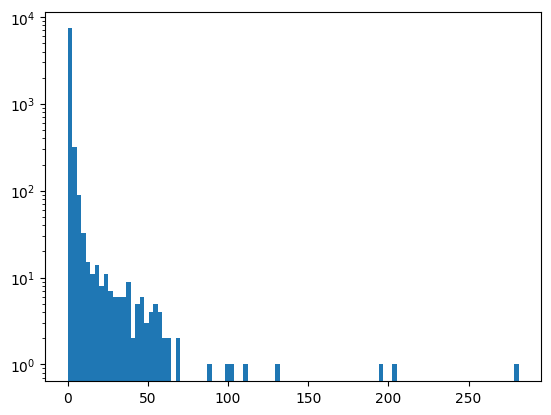

In [152]:
import matplotlib.pyplot as plt
plt.hist(dataset[1][1],bins=100)
plt.yscale('log')

In [153]:
dataset[2][0].shape[0]/2**22

3.009120464324951

# That dataloader is a bit slow for multigpu and how to shuffle it? 

Instead let's prepare a method to create to create sequences preselected/preshuffled and presplit for gpus - and a method of doing that.

In [173]:
import datasets
from functools import partial
import os
from tqdm import tqdm
import psutil
def ds_map(example, range_tuple, class_token=0):
    start, end = range_tuple
    seq, tar, sgrna = example['input_ids'], example['input_vals'], example['sgrna']
    tar_s = (seq[:start]==class_token).sum()
    tar_e = (seq[:end]==class_token).sum()
    return{'input_ids': seq[start:end], 'input_vals':tar[tar_s:tar_e], 'sgrna':sgrna}

def ds_gen_base(indices, dataset):
    #expression_h5ad="data/replogle/K562_gwps_raw_bulk_01.h5ad"
    #samples = ad.read_h5ad(expression_h5ad)
    for idx in indices:
        input_ids, input_expr, input_lfc, sgrna = dataset[idx]
        yield {'input_ids': input_ids, 'input_vals': input_lfc, 'sgrna': sgrna}
        
def split_gene_sequences(dataset, num_gpus=8, max_length=2**23, path="test", start_gpu=0):
    assert max_length%num_gpus == 0
    step = max_length//num_gpus
    seq_idxs = zip(range(0,max_length, step), range(step,max_length+1,step))
    num_samples = len(dataset)
    #data = dataset[2][0][:10].clone()
    for gpu, range_tuple in enumerate(tqdm(list(seq_idxs)[start_gpu:]),start=start_gpu):
        print(gpu, range_tuple)
        func = partial(ds_map, range_tuple=range_tuple)
        ds_temp = ds.map(func,
                            num_proc=128,
                            #keep_in_memory=False,
                            #writer_batch_size=1
                        )
        ds_temp.save_to_disk(os.path.join(path,f"gpu_{gpu}"))

In [ ]:
num_samples = len(dataset)
ds = datasets.Dataset.from_generator(partial(ds_gen_base,dataset=dataset),
                                            num_proc=128,
                                            keep_in_memory=False,
                                            writer_batch_size=1,
                                            gen_kwargs={'indices': list(range(num_samples))})
ds.save_to_disk('dataset_all_lfc_bulk')

In [168]:
import datasets
ds = datasets.load_from_disk('dataset_all_lfc_bulk').with_format('torch')

In [ ]:
split_gene_sequences(ds, 8, 2**23, 'dataset_bulk_exp23_lfc_incsg_8gpu', start_gpu=4)

  0%|          | 0/4 [00:00<?, ?it/s]

4 (4194304, 5242880)



Map (num_proc=128):  17%|█▋        | 1921/11258 [01:13<09:21, 16.63 examples/s]

In [22]:
print((datasets.load_from_disk('dataset_bulk_exp23_8gpu/gpu_0').with_format('torch')[0]['input_ids']==0).sum())
datasets.load_from_disk('dataset_bulk_exp23_8gpu/gpu_0').with_format('torch')[0]['input_vals'].shape

tensor(665)


torch.Size([665])

In [175]:
max_length=2**23
num_gpus=8
step = max_length//num_gpus
seq_idxs = zip(range(0,max_length, step), range(step,max_length+1,step))

In [26]:
ds[0]['input_ids'][:20]

tensor([ 7, 10,  9,  9, 10,  9,  9, 10,  9,  9,  9, 10,  7,  8,  9,  9,  9,  8,
         7,  8])

In [80]:
for i in range(8):
    ds = datasets.load_from_disk(f'test/gpu_{i}').with_format('torch')
    for sample in ds:
        assert len(sample['input_vals']) == (sample['input_ids']==0).sum()

In [78]:
len(ds[0]['input_vals'])

597

In [221]:
v = torch.randn(4,4,4)
v2 = v.clone()
v[[1,2,3],:,[1,2,3]][:,0]=2

In [224]:
v = torch.randn(2,4)
v

tensor([[-0.4438, -0.7757, -1.2707, -0.2519],
        [ 2.7705, -0.7071,  0.5184, -0.3156]])

In [226]:
v.view(-1)

tensor([-0.4438, -0.7757, -1.2707, -0.2519,  2.7705, -0.7071,  0.5184, -0.3156])

In [229]:
from tqdm import tqdm
for x in tqdm(ds):
    if (~x['input_vals'].isfinite()).sum():
        print((~x['input_vals'].isfinite()).sum())

100%|██████████| 11258/11258 [07:43<00:00, 24.28it/s]
